In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn import preprocessing 
import numpy as np
import os

In [2]:
cwd = os.getcwd()
test_set = pd.read_csv(os.path.join(cwd, 'datasets/test_data.csv'))
dataset = pd.DataFrame(pd.read_csv(os.path.join(cwd, 'datasets/train_data.csv')))

In [3]:
dataset.head()

,ID,parents,has_nurs,form,children,housing,finance,social,health,app_status
0,1,usual,less_proper,complete,3,critical,convenient,problematic,not_recom,0
1,2,pretentious,very_crit,completed,1,convenient,inconv,nonprob,not_recom,0
2,3,pretentious,proper,incomplete,1,less_conv,convenient,slightly_prob,priority,1
3,4,great_pret,improper,complete,1,convenient,convenient,nonprob,recommended,1
4,5,great_pret,less_proper,completed,1,convenient,convenient,slightly_prob,priority,1


dataset.head()

In [4]:
dataset.shape

(10368, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368 entries, 0 to 10367
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10368 non-null  int64 
 1   parents     10368 non-null  object
 2   has_nurs    10368 non-null  object
 3   form        10368 non-null  object
 4   children    10368 non-null  object
 5   housing     10368 non-null  object
 6   finance     10368 non-null  object
 7   social      10368 non-null  object
 8   health      10368 non-null  object
 9   app_status  10368 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 810.1+ KB


In [6]:
dataset[dataset.isnull().any(axis=1)]    # any null records available?
del dataset['ID']

In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
# Label Encoding for ordinal columns
columns_ordinal = ['parents', 'children', 'has_nurs', 'housing']

for column in columns_ordinal:
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [9]:
onehot_encoder = preprocessing.OneHotEncoder(drop='first')

In [10]:
# OneHotEncoding for nominal columns
columns_nominal = ['form', 'finance', 'social', 'health']

cleaned_dataset = dataset

for column in columns_nominal:
    X = onehot_encoder.fit_transform(dataset[column].values.reshape(-1, 1)).toarray()
    # create dataframe from encoded data
    dataset_onehot = pd.DataFrame(X, columns = [column + '_' + str(i) for i in range(X.shape[1])]) 
    # update dataset -> cleaned_dataset
    cleaned_dataset = pd.concat([dataset_onehot, cleaned_dataset], axis=1)
    # remove encoded column from dataset
    del cleaned_dataset[column]
cleaned_dataset.head()

,health_0,health_1,social_0,social_1,finance_0,form_0,form_1,form_2,parents,has_nurs,children,housing,app_status
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,2,1,0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,4,0,0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,3,0,2,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,2,0,0,1


In [11]:
# splitting complete ds to independant and dependata vars
x = cleaned_dataset.iloc[:, 1:-1]
y = cleaned_dataset.iloc[:, -1]

In [12]:
# splitting dataset to training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train[0:33]

,health_1,social_0,social_1,finance_0,form_0,form_1,form_2,parents,has_nurs,children,housing
8329,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,2,1
6453,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,3,0,2
3443,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1,3,2,2
4162,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2,3,0,2
430,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4,2,1
1091,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2,0,3,0
8432,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,2,0,2
2563,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2,0,1,1
9298,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,3,2
921,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,4,3,1


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# # training and test accuracies
# neighbors = np.arange(1, 100)
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

In [19]:
# for i, k in enumerate(neighbors) :
#     # with k neighbours
#     knn = KNeighborsClassifier(n_neighbors=k)
    
#     # fit the model
#     knn.fit(x_train, y_train)
    
#     # accuracy on training set
#     train_accuracy[i] = knn.score(x_train, y_train)
    
#     # accuracy on test set
#     test_accuracy[i] = knn.score(x_test, y_test)

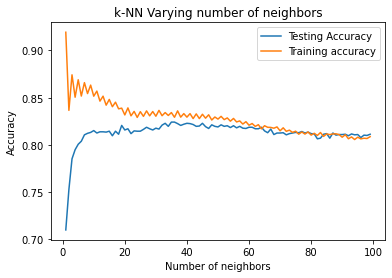

In [20]:
# import matplotlib.pyplot as plt

# # plot
# plt.title('k-NN Varying number of neighbors')
# plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
# plt.plot(neighbors, train_accuracy, label='Training accuracy')
# plt.legend()
# plt.xlabel('Number of neighbors')
# plt.ylabel('Accuracy')
# plt.show()

## Classifier

In [63]:
# max accuracy K = 34, by 10-cv K=47, 5-cv K=43

knn = KNeighborsClassifier(n_neighbors=43)

In [64]:
# model fitting
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=43)

In [65]:
# Accuracy
knn.score(x_test, y_test)

0.819672131147541

### Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix


y_pred = knn.predict(x_test)

In [67]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1892,157,2049
1,404,658,1062
All,2296,815,3111


### Classification report

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2049
           1       0.81      0.62      0.70      1062

    accuracy                           0.82      3111
   macro avg       0.82      0.77      0.79      3111
weighted avg       0.82      0.82      0.81      3111



### ROC-AUC

In [69]:
y_pred_proba = knn.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

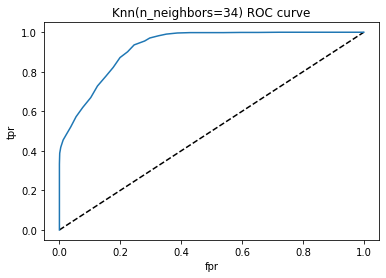

In [70]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=34) ROC curve')
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9234494066739644

### Cross Validation

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}

In [73]:
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [74]:
knn_cv.best_score_

0.8145248106597152

In [75]:
knn_cv.best_params_

{'n_neighbors': 43}